## 2. The number of steps gets very large.

From the results of the previous section, the probabilities for paths starting at **0** and ending at **k** where **k={0,1,2,...,9,*,#}** is converging to a fixed value as N increases, if the alternating zero values are ignored. The same converging pattern also occurs for the other starting vertex values shown in section 1.<br>
We reexamine the pattern for starting vertex **0**, extending the number of steps and separating the results into the two groups **V1={0,1,3,5,7,9}** and **V2={2,4,6,8,*,#}**.

![title](img/FX2.jpg)

We expect this probability pattern convergence to hold for all connected graphs $G$ since if $(v_0,v_1,v_2,...,v_N)$ is a path in $G$ and the number of steps $n$ is large enough then the probability of ending on any vertex $v \in V(G)$ is the same regardless of the choice of starting vertex $v_0$.   

In [1]:
adj=[[]]*12
adj[0]=[4,6]
adj[1]=[6,8]
adj[2]=[7,9]
adj[3]=[4,8]
adj[4]=[0,3,9]
adj[5]=[10,11]
adj[6]=[0,1,7]
adj[7]=[2,6,11]
adj[8]=[1,3]
adj[9]=[2,4,10]
adj[10]=[5,9]
adj[11]=[5,7]
print('Adjacency defined.')

import numpy as np
NV=12
M=np.zeros((NV,NV))
for i in range (NV):
    for a in adj[i]:
        M[i,int(a)]=1.


Adjacency defined.


In [2]:
Nstep=31
A=np.eye(12)        # A^0=I
v=np.zeros((NV,1))
v[0,0]=1.           # v=(1,0,...,0)^T

B=np.zeros((Nstep,12)) # stores the probability after each step 
Q=np.zeros(Nstep)      # stores the total number of possible paths after each step
for i in range(Nstep):
    Q[i]=sum(np.dot(A,v))
    B[i]=np.dot(A,v).T/Q[i]
    A=np.dot(A,M)
print('Probabilities calculated after N=' + str(Nstep-1))


Probabilities calculated after N=30


In [3]:
import pandas as pd
DF0=pd.DataFrame(B,columns='0 1 2 3 4 5 6 7 8 9 * #'.split())

In [4]:
DF0_even=DF0[['0','1','3','5','7','9']]
print("The probabilities of starting from '0' after an even-number steps.")
DF0_even[DF0_even['0'] != 0.0]


The probabilities of starting from '0' after an even-number steps.


,0,1,3,5,7,9
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.333333,0.166667,0.166667,0.000000,0.166667,0.166667
4,0.222222,0.166667,0.166667,0.055556,0.194444,0.194444
6,0.196262,0.154206,0.154206,0.084112,0.205607,0.205607
8,0.187402,0.145669,0.145669,0.097638,0.211811,0.211811
10,0.183554,0.140849,0.140849,0.104244,0.215252,0.215252
12,0.181692,0.138267,0.138267,0.107569,0.217102,0.217102
14,0.180752,0.136911,0.136911,0.109270,0.218078,0.218078
16,0.180269,0.136203,0.136203,0.110148,0.218589,0.218589
18,0.180019,0.135835,0.135835,0.110602,0.218854,0.218854


The probability **pr(0)** is decreasing from **1.0000** and converging to a value of **0.1797** while **pr(5)** is increasing from **0.0556** at the 4th step and converging to **0.1111**. Plot of the results for even number steps associated with **V1** and odd number steps for **V2** are shown below. The probabilities are decreasing for {**0,1,3**}  and increasing for {**5,7,9**} in **V1**, and are decreasing for {**4,6,8**}  and increasing for {**2,*,#**} in **V2**. 

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

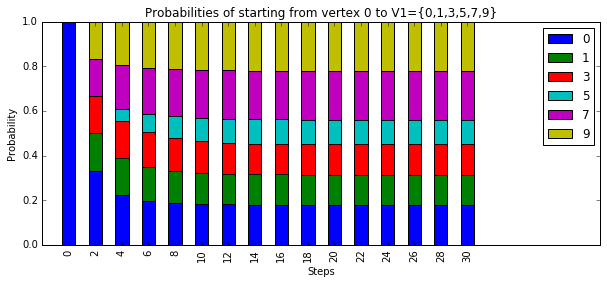

In [6]:
DF0_even[DF0_even['0'] != 0.0].plot.bar(figsize=(10,4),stacked=True,ylim=(0,1)).set_xlim([-1,20])
plt.title('Probabilities of starting from vertex 0 to V1={0,1,3,5,7,9}')
plt.xlabel('Steps')
plt.ylabel('Probability')


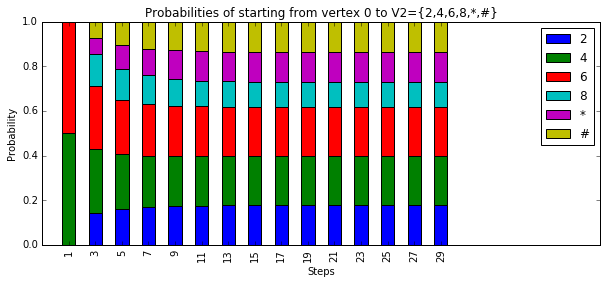

In [7]:
DF0_odd=DF0[['2','4','6','8','*','#']]
DF0_odd[DF0_odd['4'] != 0.0].plot.bar(figsize=(10,4),stacked=True,ylim=(0,1)).set_xlim([-1,20])
plt.title('Probabilities of starting from vertex 0 to V2={2,4,6,8,*,#}')
plt.xlabel('Steps')
plt.ylabel('Probability')


Repeating the same procedures for starting vertex **4**.

In [8]:
Nstep=31
A=np.eye(12)        # A^0=I
v=np.zeros((NV,1))
v[4,0]=1.           # vertex 4

B=np.zeros((Nstep,12)) # stores the probability after each step 
Q=np.zeros(Nstep)      # stores the total number of possible paths after each step
for i in range(Nstep):
    Q[i]=sum(np.dot(A,v))
    B[i]=np.dot(A,v).T/Q[i]
    A=np.dot(A,M)


In [9]:
DF4=pd.DataFrame(B,columns='0 1 2 3 4 5 6 7 8 9 * #'.split())
DF4_even=DF4[['2','4','6','8','*','#']]
DF4_odd=DF4[['0','1','3','5','7','9']]


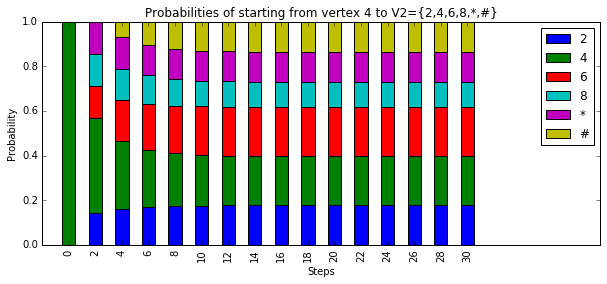

In [10]:
DF4_even[DF4_even['4'] != 0.0].plot.bar(figsize=(10,4),stacked=True,ylim=(0,1)).set_xlim([-1,20])
plt.title('Probabilities of starting from vertex 4 to V2={2,4,6,8,*,#}')
plt.xlabel('Steps')
plt.ylabel('Probability')


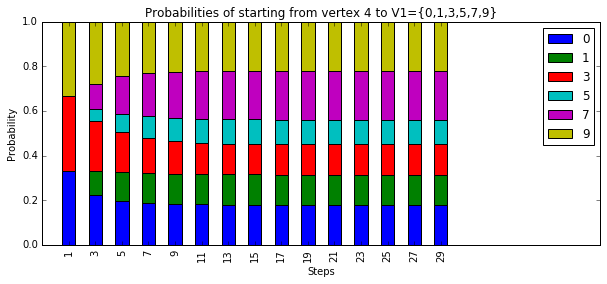

In [11]:
DF4_odd[DF4_odd['0'] != 0.0].plot.bar(figsize=(10,4),stacked=True,ylim=(0,1)).set_xlim([-1,20])
plt.title('Probabilities of starting from vertex 4 to V1={0,1,3,5,7,9}')
plt.xlabel('Steps')
plt.ylabel('Probability')


Repeating the same procedures for vertex **5**.

In [12]:
Nstep=31
A=np.eye(12)        # A^0=I
v=np.zeros((NV,1))
v[5,0]=1.           # vertex 5

B=np.zeros((Nstep,12)) # stores the probability after each step 
Q=np.zeros(Nstep)      # stores the total number of possible paths after each step
for i in range(Nstep):
    Q[i]=sum(np.dot(A,v))
    B[i]=np.dot(A,v).T/Q[i]
    A=np.dot(A,M)


In [13]:
DF5=pd.DataFrame(B,columns='0 1 2 3 4 5 6 7 8 9 * #'.split())
DF5_odd=DF5[['2','4','6','8','*','#']]
DF5_even=DF5[['0','1','3','5','7','9']]


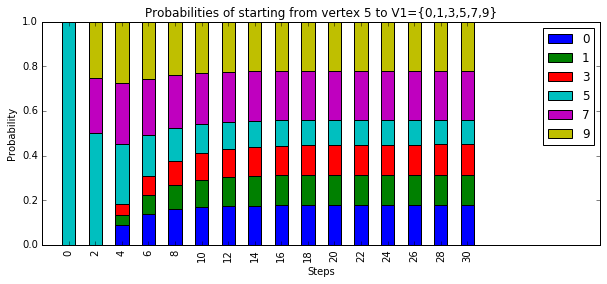

In [14]:
DF5_even[DF5_even['5'] != 0.0].plot.bar(figsize=(10,4),stacked=True,ylim=(0,1)).set_xlim([-1,20])
plt.title('Probabilities of starting from vertex 5 to V1={0,1,3,5,7,9}')
plt.xlabel('Steps')
plt.ylabel('Probability')


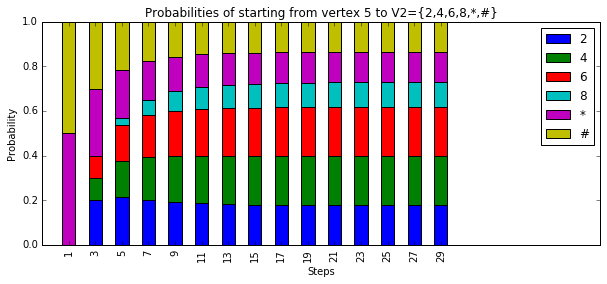

In [15]:
DF5_odd[DF5_odd['*'] != 0.0].plot.bar(figsize=(10,4),stacked=True,ylim=(0,1)).set_xlim([-1,20])
plt.title('Probabilities of starting from vertex 5 to V2={2,4,6,8,*,#}')
plt.xlabel('Steps')
plt.ylabel('Probability')


The final or asymptotic probability distribution patterns are the same for both vertex **0** and vertex **5**.  Though not shown, the above codes were also ran for all the other vertices and the same probability distribution pattern emerges.  This means that after a sufficiently large number of steps the probability of landing any button is the same regardless of which button you start on.  We check the results for non-bipartitie graph.     

We add an edge (**2,4**) to the graph $G$ so that the graph is no longer bi-partite then we check the probability distribution after 40 steps. The results are the same as for the bipartite graph except the distribution is to all 12 vertiices are at each step. 

In [16]:
adj[2]=[4,7,9]
adj[4]=[0,2,3,9]
M1=np.zeros((NV,NV))
for i in range (NV):
    for a in adj[i]:
        M1[i,int(a)]=1.


In [17]:
Nstep=41
A=np.eye(12)        # A^0=I
v=np.zeros((NV,1))
v[0,0]=1.           # v=(1,0,...,0)^T

B=np.zeros((Nstep,12)) # stores the probability after each step 
Q=np.zeros(Nstep)      # stores the total number of possible paths after each step
for i in range(Nstep):
    Q[i]=sum(np.dot(A,v))
    B[i]=np.dot(A,v).T/Q[i]
    A=np.dot(A,M1)


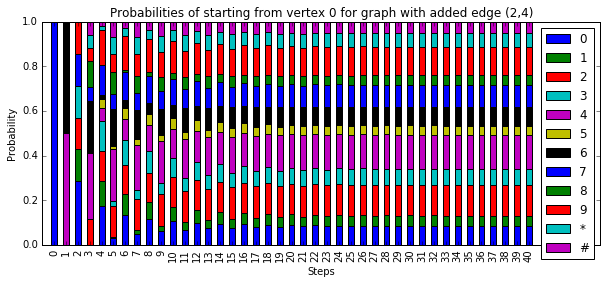

In [18]:
DFF0=pd.DataFrame(B,columns='0 1 2 3 4 5 6 7 8 9 * #'.split())
DFF0.plot.bar(figsize=(10,4),stacked=True,ylim=(0,1)).set_xlim([-1,46])
plt.title('Probabilities of starting from vertex 0 for graph with added edge (2,4)')
plt.xlabel('Steps')
plt.ylabel('Probability')


In [19]:
Nstep=41
A=np.eye(12)        # A^0=I
v=np.zeros((NV,1))
v[4,0]=1.           # vertex 4

B=np.zeros((Nstep,12)) # stores the probability after each step 
Q=np.zeros(Nstep)      # stores the total number of possible paths after each step
for i in range(Nstep):
    Q[i]=sum(np.dot(A,v))
    B[i]=np.dot(A,v).T/Q[i]
    A=np.dot(A,M1)


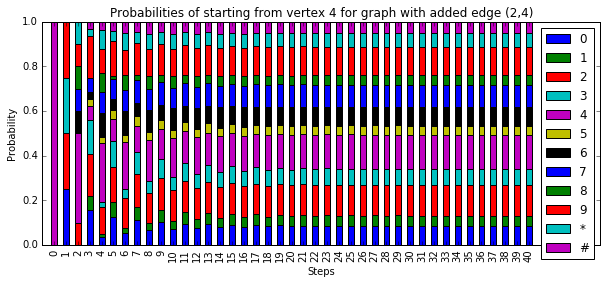

In [20]:
DFF4=pd.DataFrame(B,columns='0 1 2 3 4 5 6 7 8 9 * #'.split())
DFF4.plot.bar(figsize=(10,4),stacked=True,ylim=(0,1)).set_xlim([-1,46])
plt.title('Probabilities of starting from vertex 4 for graph with added edge (2,4)')
plt.xlabel('Steps')
plt.ylabel('Probability')


In [25]:
Nstep=41
A=np.eye(12)        # A^0=I
v=np.zeros((NV,1))
v[4,0]=1.           # vertex 4
v[7,0]=3.
B=np.zeros((Nstep,12)) # stores the probability after each step 
Q=np.zeros(Nstep)      # stores the total number of possible paths after each step
for i in range(Nstep):
    Q[i]=sum(np.dot(A,v))
    B[i]=np.dot(A,v).T/Q[i]
    A=np.dot(A,M1)


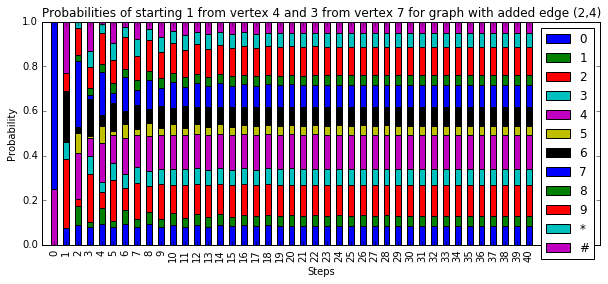

In [26]:
DFFV=pd.DataFrame(B,columns='0 1 2 3 4 5 6 7 8 9 * #'.split())
DFFV.plot.bar(figsize=(10,4),stacked=True,ylim=(0,1)).set_xlim([-1,46])
plt.title('Probabilities of starting 1 from vertex 4 and 3 from vertex 7 for graph with added edge (2,4)')
plt.xlabel('Steps')
plt.ylabel('Probability')


### Conclusions
If the number of steps is very large then the probability of landing on any button is the same regardless of where and how many knight chess pieces are placed and used.

This is true for all graphs $G$. The proof uses the Laplacian matrix of $G$ and I will present it if requested.   

> Our result in mathematical terms for a non-bipartite graph (a bipartite graph has a slightly different format):

$$lim_{n\to\infty} (M)^n = \begin{bmatrix}
                           p_1 \alpha_1 &p_1 \alpha_2 &\cdots& p_1 \alpha_N \\
                           p_2 \alpha_1 &p_2 \alpha_2 &\cdots& p_2 \alpha_N \\
                            \vdots&\vdots&\ddots&\vdots\\
                           p_N \alpha_1 &p_N \alpha_2 &\cdots& p_N \alpha_N \\
                            \end{bmatrix}
\quad\text{     where     }\quad
\alpha_i = \sum\limits_{k=1}^{N} M_{ki}^n, 
\quad p_i= \frac{M_{ii}^n}{\sum\limits_{k=1}^{N} M_{ki}^n} 
$$.

Intuitively, the above is true by analogy to heat diffusion. It is analogous to the situation of introducing a hot item into a close insulated container.  The temperature everywhere in the container will eventually reach the same value regardless of where the item is placed initially.

> The heat equation in one-dimension:

$$
\frac{\partial T}{\partial t}=\beta \frac{\partial^2 T}{\partial x^2}
\quad\text{where}\quad
\begin{matrix}
x \in [x_1,x_2]\\
\frac{dT}{dx} \Bigr\rvert_{x = x_1}=\frac{dT}{dx} \Bigr\rvert_{x = x_2}=0\\
\beta \text{ the diffusion coefficient}\\
T(x_*,t=0)=1, x_* \in [x_1,x_2]\\
T(t=0)=0 \text{ everywhere else}
\end{matrix}
$$

The probability vector $p$ is like the temperature $T$, the time derivative $\partial /\partial t$ the change from $n+1$ to $n-1$, and $\beta\partial^2 /\partial x^2$ the change due to incoming and outgoing paths represented by the Laplacian matrix. 

The result is expected since the graph $G$ associated with $M$ represents a closed network system with no additional input or output introduced to the system after specifying the initial condition. So as $n \to \infty$ the system represented by $G$ should reach an equilibrium or steady state. 

Our deduced mathematical result has many practical applications, particularly in this age of "big data". Some examples are:
1. Can be used to determine the friendship network for selling a product.
2. If data is transmitted through specific channels, determine and find if there are any data leaks and where they are.
3. If a virus is contacted on a road between two towns and people are traveling constantly on the roads in the region. What is the probability that a person will contract the virus zero, one, two or three times. Given this probability info, identify the infected road between the two towns.

I find myself asking the questions below regarding and related to the above examples and their implementation:

> 1. How do we estimate the probability vector $p$? What info do we need for this? What is considered a good estimation? How accurate does $p$ have to be to give $M$ associated with $G$? How much "fudging" can we do?  I suspect there is some "wiggle room" because $|V|$ is finite, so the number of valid $p$ is also finite and discrete.  What range of values of $p$ can we rule out?  

> 2. How large does $n$ have to be to get good results?  What factors affect the choice for $n$?  If we don't choose a large enough $n$, what type of results will we see? Of course, picking $n$ vey large means that $|\alpha|$ is also very large, making numerical and computational errors more likely.  So what is the best range of choices for $n$?

> 3. Given a good estimation for $p$,and we know $\alpha$ and $n$, we can find an approximation of $M$ by applying spectral decomposition to $p\alpha^T$. But how close will this approximation be? The diagonal of the exact $M$ is zeros, can we use some sort of optimization to adjust the $p\alpha^T$ decomposition so that we get a better approximation of $M$. That is, a straight decomposition will give a "blurred" image of $M$ and we want the optimization to "sharpened" the image. What are some of the computational difficulties when $|V|$ gets very large? What if $M$ is fairly sparse? Which programs from *Scipy* or *SKlearn* are best for the job? (*I am currently working on this.*)  

> 4. How well matched do the values for $n$ and $\alpha$ have to be to give good results?  What happens if we use a value for $n$ that is less than the actual value associated with $\alpha$?  If this happens, can we salvage the situation and when should we attempt to salvage?  What if we use a value for $n$ that is much larger than that used for calculating $\alpha$? How do we adjust our solution technique to account for this potential discrepancy between $n$ and $\alpha$?

> 5. Suppose $G$ represents a network for messages sent back and forth between locations $v_i$. What plan should we use and what information should be collected by the operator placed at each location? If we have an errant operator(s) sleeping and not sending messages but leaving incoming messages to pile up. We can use our theory to find where the errant operator(s) is in our network and who he/they is connected to?  What type of information do we need to have and how accurate does this info need to be?

> 6. What happens to $M$ if we add or subtract an edge from the existing graph $G$? Looking at $p(G)$ and $p(G-\epsilon)$, $\epsilon$ is the deleted edge, is it possible to find where $\epsilon$ is? 